# Running your first example

In this section we run an example simulation of MUSE and visualise the results. There are a number of different examples in the source code, which can be found [INSERT LINK HERE](dead-link). 

Once python and MUSE have been installed, we can run an example. To do this open anaconda prompt. Then change directory to where you have downloaded the MUSE source code. 

Navigate to the following link for MacOS or Linux based operating systems:

`{MUSE_download_location}/StarMuse/run/example/default/`

Change ```{MUSE_download_location}``` to the location you downloaded MUSE to, for example ```Users/{my_name}/Documents/``` using the `cd` command, or "change directory" command. Once we have navigated to the directory containing the example settings ```settings.toml``` we can run the simulation using the following command in the anaconda prompt or terminal:

`python -m muse settings.toml`

If running correctly, your prompt should output text similar to that which can be found [here](example-output.ipynb).

It is also possible to run MUSE directly in python using the following code:

In [ ]:
from muse import examples
model = examples.model("default")
model.run()

## Results

If the default MUSE example has run successfully, you should now have a folder called ```Results``` in the same directory as ```settings.toml```.

This directory should contain results for each sector (```Gas```,```Power``` and ```Residential```) as well as results for the entire simulation in the form of ```MCACapacity.csv``` and ```MCAPrices.csv```. 

- ```MCACapacity.csv``` contains information about the capacity each agent has for each technology per year.

- ```MCAPrices.csv``` has the price of each commodity per year and timeslice. eg. the cost of electricity at night for electricity in 2020.

Within each of the sector result folders, there is an output for ```Capacity``` for each commodity in each year. The years into the future, which the simulation has not run to, refers to the capacity as it retires. Within the ```Residential``` folder there is also a folder for ```Supply``` within each year. This refers to how much end-use commodity was output.

It is possible to extend the outputs using hooks. To see how to do this refer to the developer guide [here](advanced-guide/extending-muse.ipynb).

## Visualisation

Now, we can visualise the results of our first simulation! For this we will need to install a data management package called ```pandas```, as well as data visualisation software, ```matplotlib``` and ```seaborn```.

This can be done with the following command:

`python -m pip install --user pandas`

To install ```matplotlib``` and ```seaborn``` replace ```pandas``` in the previous command with the respective package name.

Firstly, we import the packages required to visualise the results.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Next, we load the dataset of interest to us for this example: the ```MCACapacity.csv``` file. We do this using pandas.

In [2]:
capacity_results = pd.read_csv("Results/MCAcapacity.csv")
capacity_results.head()

,technology,region,agent,type,sector,capacity,year
0,gasboiler,R1,A1,retrofit,residential,10.0,2020
1,gasCCGT,R1,A1,retrofit,power,1.0,2020
2,gassupply1,R1,A1,retrofit,gas,15.0,2020
3,gasboiler,R1,A1,retrofit,residential,5.0,2025
4,heatpump,R1,A1,retrofit,residential,19.0,2025


Using the ```head``` command we print the first five rows of our dataset. Next, we will visualise each of the sectors, with capacity on the y-axis and year on the x-axis.

Don't worry too much about the code if some of it is unfamiliar. We effectively split the data into each sector and then plot a line plot for each.

gas sector


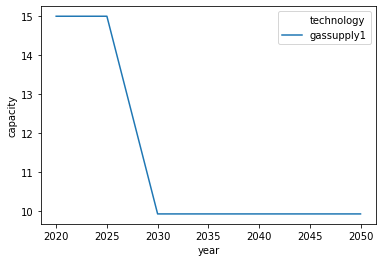

power sector


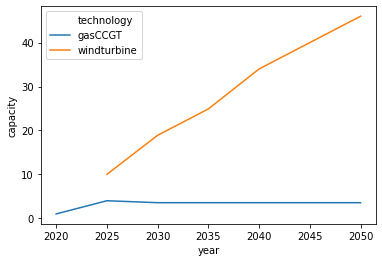

residential sector


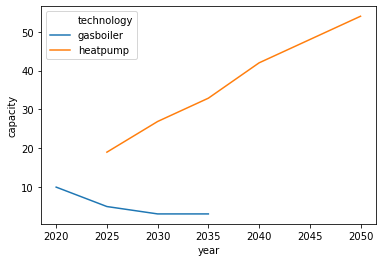

In [3]:
for sector_name, results in capacity_results.groupby("sector"):
    print("{} sector".format(sector_name))
    sns.lineplot(data=results, x="year", y="capacity", hue="technology")
    plt.show()
    plt.close()

In this toy example, we can see that the end-use technology of choice in the residential sector becomes a heatpump. The heatpump displaces the gas boiler. Therefore, the supply of gas crashes due to a reduced demand. To account for the increase in demand for electricity, the agent invests heavily in wind turbines.

## Next steps

If you want to jump straight into customising your own example scenarios, head to the link [here](user-guide/index.rst). If you would like a little bit of background based on how MUSE works first, head to the next section!